<a href="https://colab.research.google.com/github/dpintor1/Aprendizaje-automatico/blob/master/Aprendizaje_No_Supervisado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ingeniería de Caracteres
## Estudiantes:
### Carlos Cerro
### Daniel Pinto

Lo primero que vamos a realizar, es a traer la base de datos de las carcterísticas de los jugadores. Nos conectaremos a la bd que se encuentra guardada en Google Drive y de ahí obtendremos los datos

In [0]:
#Librerias importantes
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
import sqlite3
import scipy.stats as ss


In [0]:
#Obtenemos acceso a google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
#Ruta para obtener los datos
ruta = '/content/drive/My Drive/Maestría en ciencia de los datos y análitica/Aprendizaje Automatico/'
bd = ruta +'database.sqlite'

In [0]:
conn = sqlite3.connect(bd)

In [0]:
data = pd.read_sql("""SELECT *
                              FROM Player_Attributes;""", conn)

In [0]:
d = data.dtypes

In [0]:
print(d.to_latex(index = True))

\begin{tabular}{ll}
\toprule
{} &        0 \\
\midrule
id                  &    int64 \\
player\_fifa\_api\_id  &    int64 \\
player\_api\_id       &    int64 \\
date                &   object \\
overall\_rating      &  float64 \\
potential           &  float64 \\
preferred\_foot      &   object \\
attacking\_work\_rate &   object \\
defensive\_work\_rate &   object \\
crossing            &  float64 \\
finishing           &  float64 \\
heading\_accuracy    &  float64 \\
short\_passing       &  float64 \\
volleys             &  float64 \\
dribbling           &  float64 \\
curve               &  float64 \\
free\_kick\_accuracy  &  float64 \\
long\_passing        &  float64 \\
ball\_control        &  float64 \\
acceleration        &  float64 \\
sprint\_speed        &  float64 \\
agility             &  float64 \\
reactions           &  float64 \\
balance             &  float64 \\
shot\_power          &  float64 \\
jumping             &  float64 \\
stamina             &  float64 \\
strength

# Limpieza de la base de datos
En esta sección haremos la limpieza de los datos y su tratamiento adecuado para poder realizar la ingeniería de característica 

In [0]:
#Eliminar filas con datos nulos
data = data.dropna() 

In [0]:
newdata = data.drop(["id","player_fifa_api_id","player_api_id","date"],axis = 1)
newdata

,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,62.0,66.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,63.0,41.0,45.0,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183973,83.0,85.0,right,medium,low,84.0,77.0,59.0,89.0,77.0,84.0,86.0,78.0,84.0,85.0,66.0,72.0,77.0,86.0,73.0,76.0,58.0,72.0,67.0,81.0,56.0,78.0,86.0,88.0,83.0,22.0,31.0,30.0,9.0,20.0,84.0,20.0,20.0
183974,78.0,80.0,right,medium,low,74.0,76.0,53.0,84.0,77.0,85.0,86.0,74.0,73.0,86.0,66.0,67.0,77.0,74.0,73.0,75.0,58.0,66.0,65.0,73.0,61.0,64.0,72.0,88.0,70.0,32.0,31.0,30.0,9.0,20.0,73.0,20.0,20.0
183975,77.0,80.0,right,medium,low,74.0,71.0,53.0,84.0,77.0,85.0,86.0,74.0,73.0,86.0,66.0,67.0,77.0,74.0,73.0,75.0,58.0,66.0,65.0,73.0,67.0,64.0,72.0,88.0,70.0,32.0,31.0,30.0,9.0,20.0,73.0,20.0,20.0
183976,78.0,81.0,right,medium,low,74.0,64.0,57.0,86.0,77.0,87.0,86.0,73.0,73.0,91.0,61.0,60.0,77.0,69.0,73.0,72.0,58.0,67.0,59.0,78.0,63.0,63.0,68.0,88.0,53.0,28.0,32.0,30.0,9.0,20.0,73.0,20.0,20.0


In [0]:
newdata.duplicated()
newdata = newdata.drop_duplicates()
newdata

,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,62.0,66.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,63.0,41.0,45.0,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
5,74.0,76.0,left,high,medium,80.0,53.0,58.0,71.0,40.0,73.0,70.0,69.0,68.0,71.0,79.0,78.0,78.0,67.0,90.0,71.0,85.0,79.0,56.0,62.0,68.0,67.0,60.0,66.0,59.0,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0
6,74.0,76.0,left,high,medium,80.0,53.0,58.0,71.0,32.0,73.0,70.0,69.0,68.0,71.0,79.0,78.0,78.0,67.0,90.0,71.0,85.0,79.0,56.0,60.0,68.0,67.0,60.0,66.0,59.0,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183973,83.0,85.0,right,medium,low,84.0,77.0,59.0,89.0,77.0,84.0,86.0,78.0,84.0,85.0,66.0,72.0,77.0,86.0,73.0,76.0,58.0,72.0,67.0,81.0,56.0,78.0,86.0,88.0,83.0,22.0,31.0,30.0,9.0,20.0,84.0,20.0,20.0
183974,78.0,80.0,right,medium,low,74.0,76.0,53.0,84.0,77.0,85.0,86.0,74.0,73.0,86.0,66.0,67.0,77.0,74.0,73.0,75.0,58.0,66.0,65.0,73.0,61.0,64.0,72.0,88.0,70.0,32.0,31.0,30.0,9.0,20.0,73.0,20.0,20.0
183975,77.0,80.0,right,medium,low,74.0,71.0,53.0,84.0,77.0,85.0,86.0,74.0,73.0,86.0,66.0,67.0,77.0,74.0,73.0,75.0,58.0,66.0,65.0,73.0,67.0,64.0,72.0,88.0,70.0,32.0,31.0,30.0,9.0,20.0,73.0,20.0,20.0
183976,78.0,81.0,right,medium,low,74.0,64.0,57.0,86.0,77.0,87.0,86.0,73.0,73.0,91.0,61.0,60.0,77.0,69.0,73.0,72.0,58.0,67.0,59.0,78.0,63.0,63.0,68.0,88.0,53.0,28.0,32.0,30.0,9.0,20.0,73.0,20.0,20.0


In [0]:
# modo alternativo de binarizar en pandas: newdata["preferred_foot_bin"] = newdata["preferred_foot"].apply(lambda val: 1 if val == "right" else 0)
#Binarizamos la variable resultado, que en nuestro caso es si el pie preferido
#del jugador es el izquierdo o el derecho
enc = LabelEncoder()
newdata["preferred_foot_bin"] = enc.fit_transform(newdata["preferred_foot"])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [0]:
# Eliminar filas en las que los valores de attacking_work_rate o defensive_work_rate son diferentes de low, medium o high.
newdata = newdata.drop(newdata[(newdata.attacking_work_rate != "low") & (newdata.attacking_work_rate != "medium") & (newdata.attacking_work_rate != "high")].index)
newdata = newdata.drop(newdata[(newdata.defensive_work_rate != "low") & (newdata.defensive_work_rate != "medium") & (newdata.defensive_work_rate != "high")].index)
newdata

,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,preferred_foot_bin
0,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0,1
2,62.0,66.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,63.0,41.0,45.0,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0,1
3,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0,1
5,74.0,76.0,left,high,medium,80.0,53.0,58.0,71.0,40.0,73.0,70.0,69.0,68.0,71.0,79.0,78.0,78.0,67.0,90.0,71.0,85.0,79.0,56.0,62.0,68.0,67.0,60.0,66.0,59.0,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0,0
6,74.0,76.0,left,high,medium,80.0,53.0,58.0,71.0,32.0,73.0,70.0,69.0,68.0,71.0,79.0,78.0,78.0,67.0,90.0,71.0,85.0,79.0,56.0,60.0,68.0,67.0,60.0,66.0,59.0,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183973,83.0,85.0,right,medium,low,84.0,77.0,59.0,89.0,77.0,84.0,86.0,78.0,84.0,85.0,66.0,72.0,77.0,86.0,73.0,76.0,58.0,72.0,67.0,81.0,56.0,78.0,86.0,88.0,83.0,22.0,31.0,30.0,9.0,20.0,84.0,20.0,20.0,1
183974,78.0,80.0,right,medium,low,74.0,76.0,53.0,84.0,77.0,85.0,86.0,74.0,73.0,86.0,66.0,67.0,77.0,74.0,73.0,75.0,58.0,66.0,65.0,73.0,61.0,64.0,72.0,88.0,70.0,32.0,31.0,30.0,9.0,20.0,73.0,20.0,20.0,1
183975,77.0,80.0,right,medium,low,74.0,71.0,53.0,84.0,77.0,85.0,86.0,74.0,73.0,86.0,66.0,67.0,77.0,74.0,73.0,75.0,58.0,66.0,65.0,73.0,67.0,64.0,72.0,88.0,70.0,32.0,31.0,30.0,9.0,20.0,73.0,20.0,20.0,1
183976,78.0,81.0,right,medium,low,74.0,64.0,57.0,86.0,77.0,87.0,86.0,73.0,73.0,91.0,61.0,60.0,77.0,69.0,73.0,72.0,58.0,67.0,59.0,78.0,63.0,63.0,68.0,88.0,53.0,28.0,32.0,30.0,9.0,20.0,73.0,20.0,20.0,1


In [0]:
#Procedemos a dummizar las variables attacking_work_rate y defensive_work_rate
#Hay un problema al dummizar las variables, quedan repetidas las columnas low, medium y high dos veces.
newcols = pd.get_dummies(newdata["attacking_work_rate"])
newcols1 = pd.get_dummies(newdata["defensive_work_rate"])
newcols.rename(columns={'low':'low_attacking','medium':'medium_attacking','high':'high_attacking'}, inplace=True)
newcols = newcols.reset_index(drop=True)
newcols1 = newcols1.reset_index(drop = True)

#Luego obtenemos procedemos a separar las variables númericas en X_num
#y también separamos la variable resultado en la variable "Y"
X_num = newdata.drop(["preferred_foot", "attacking_work_rate", "defensive_work_rate","preferred_foot_bin"], axis = 1)
Y = newdata[["preferred_foot_bin"]]
Y = Y.reset_index(drop = True)

#Normalizamos las variables numericas X_num
from sklearn import preprocessing
x = X_num.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
X_norm = pd.DataFrame(x_scaled, columns=X_num.columns)

#Por último añadimos las variables dummizadas a la bd númerica normalizad 
X = pd.concat([X_norm, newcols, newcols1], axis=1)
X

,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,high_attacking,low_attacking,medium_attacking,high,low,medium
0,0.557377,0.551724,0.510638,0.447917,0.721649,0.617021,0.467391,0.520833,0.467391,0.395833,0.648936,0.478261,0.559524,0.611765,0.564706,0.379747,0.630952,0.557895,0.536585,0.511628,0.767442,0.357895,0.714286,0.726316,0.462366,0.552083,0.489362,0.688172,0.723404,0.720430,0.053763,0.108696,0.093750,0.073684,0.073684,0,0,1,0,0,1
1,0.475410,0.465517,0.510638,0.447917,0.721649,0.617021,0.467391,0.520833,0.467391,0.395833,0.648936,0.478261,0.559524,0.611765,0.564706,0.379747,0.630952,0.557895,0.536585,0.511628,0.767442,0.357895,0.626374,0.421053,0.462366,0.552083,0.489362,0.688172,0.691489,0.720430,0.053763,0.108696,0.093750,0.073684,0.073684,0,0,1,0,0,1
2,0.459016,0.448276,0.500000,0.437500,0.711340,0.606383,0.456522,0.510417,0.456522,0.385417,0.638298,0.467391,0.559524,0.611765,0.564706,0.367089,0.630952,0.547368,0.536585,0.511628,0.767442,0.347368,0.615385,0.410526,0.451613,0.541667,0.478723,0.655914,0.659574,0.688172,0.043011,0.097826,0.083333,0.063158,0.063158,0,0,1,0,0,1
3,0.672131,0.637931,0.840426,0.541667,0.587629,0.723404,0.423913,0.750000,0.739130,0.708333,0.691489,0.717391,0.785714,0.776471,0.788235,0.632911,0.928571,0.726316,0.865854,0.802326,0.534884,0.642105,0.681319,0.694737,0.623656,0.677083,0.606383,0.806452,0.787234,0.817204,0.139785,0.065217,0.083333,0.084211,0.115789,1,0,0,0,0,1
4,0.672131,0.637931,0.840426,0.541667,0.587629,0.723404,0.336957,0.750000,0.739130,0.708333,0.691489,0.717391,0.785714,0.776471,0.788235,0.632911,0.928571,0.726316,0.865854,0.802326,0.534884,0.621053,0.681319,0.694737,0.623656,0.677083,0.606383,0.806452,0.787234,0.817204,0.139785,0.065217,0.083333,0.084211,0.115789,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132911,0.819672,0.793103,0.882979,0.791667,0.597938,0.914894,0.826087,0.864583,0.913043,0.802083,0.861702,0.869565,0.630952,0.705882,0.776471,0.873418,0.726190,0.778947,0.536585,0.720930,0.662791,0.842105,0.549451,0.810526,0.903226,0.906250,0.861702,0.225806,0.319149,0.301075,0.086022,0.206522,0.864583,0.200000,0.200000,0,0,1,0,1,0
132912,0.737705,0.706897,0.776596,0.781250,0.536082,0.861702,0.826087,0.875000,0.913043,0.760417,0.744681,0.880435,0.630952,0.647059,0.776471,0.721519,0.726190,0.768421,0.536585,0.651163,0.639535,0.757895,0.604396,0.663158,0.752688,0.906250,0.723404,0.333333,0.319149,0.301075,0.086022,0.206522,0.750000,0.200000,0.200000,0,0,1,0,1,0
132913,0.721311,0.706897,0.776596,0.729167,0.536082,0.861702,0.826087,0.875000,0.913043,0.760417,0.744681,0.880435,0.630952,0.647059,0.776471,0.721519,0.726190,0.768421,0.536585,0.651163,0.639535,0.757895,0.670330,0.663158,0.752688,0.906250,0.723404,0.333333,0.319149,0.301075,0.086022,0.206522,0.750000,0.200000,0.200000,0,0,1,0,1,0
132914,0.737705,0.724138,0.776596,0.656250,0.577320,0.882979,0.826087,0.895833,0.913043,0.750000,0.744681,0.934783,0.571429,0.564706,0.776471,0.658228,0.726190,0.736842,0.536585,0.662791,0.569767,0.810526,0.626374,0.652632,0.709677,0.906250,0.542553,0.290323,0.329787,0.301075,0.086022,0.206522,0.750000,0.200000,0.200000,0,0,1,0,1,0


# Relaciones entre variables
En esta sección pretendemos realizar los correlogramas de nuestras variables normalizadas. Se utilizarán los métodos de Pearson, Kendall y Spearman. Luego haremos un cross tab de nuestras dos variables categoricas para conocer la relación entre estás dos. Por último realizaremos la entropía de Shannon para determinar que tanta información se obtiene con cada una de las variables

## Tabulaciones cruzadas

In [0]:
print(pd.crosstab(newdata.attacking_work_rate, newdata.defensive_work_rate))

defensive_work_rate   high   low  medium
attacking_work_rate                     
high                  6401  4236   22105
low                   2605   544    3533
medium               12289  8947   72256


In [0]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

In [0]:
cramers_v(newdata.attacking_work_rate, newdata.defensive_work_rate)

0.12203009638247342

## Correlogramas

In [0]:
#Crear la matriz de correlaciones con cada uno de los métodos mencionados
corr_pearson = X_norm.corr(method='pearson')
corr_kendall = X_norm.corr(method='kendall')
corr_spearman = X_norm.corr(method='spearman')

In [0]:
#corr_spearman.to_excel('/content/drive/My Drive/Maestría en ciencia de los datos y análitica/Aprendizaje Automatico/spearman.xlsx')
#corr_kendall.to_excel('/content/drive/My Drive/Maestría en ciencia de los datos y análitica/Aprendizaje Automatico/kendall.xlsx')
#corr_pearson.to_excel('/content/drive/My Drive/Maestría en ciencia de los datos y análitica/Aprendizaje Automatico/pearson.xlsx')

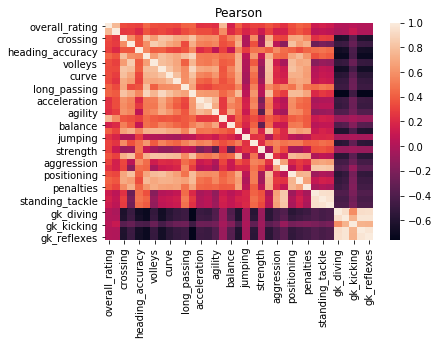

In [0]:
#Observemos primero el correlograma de pearson
ax = plt.axes()
sns.heatmap(corr_pearson)
ax.set_title('Pearson')
plt.show()

Por el correlograma de pearson anterior, podemos observar que las variables de habilidades en el arco, están muy correlacionadas entre ellas, por lo tanto proponemos generar una variable indicador con el promedio de estás y de esta manera dejar un "overall_gk" que me resuma las habilidades en el arco

In [0]:
X['overall_gk']=X.loc[:,['gk_diving','gk_handling','gk_kicking','gk_positioning','gk_reflexes']].mean(axis=1)
#Por lo tanto ya no es necesario tener el resto de variables
X.drop(['gk_diving','gk_handling','gk_kicking','gk_positioning','gk_reflexes'], axis=1, inplace= True)

A continuación observamos los correlogramas de Kendall y Spearman, con ellos tomamos las decisiones sobre las variables nominales que vamos a utilizar

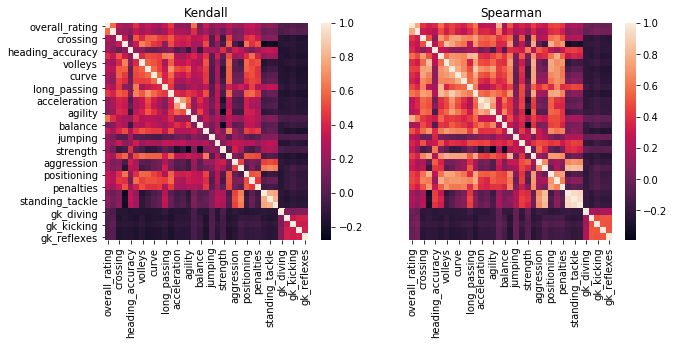

In [0]:
#Graficamos los correlogramas de Kendall y Spearman
fig = plt.figure(figsize = (10,4))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)


sns.heatmap(data=corr_kendall, ax=ax1)
sns.heatmap(data=corr_spearman, ax=ax2, yticklabels=False)

ax1.set_title('Kendall')
ax2.set_title('Spearman')
plt.show()

La variable "marking" esta muy correlacionada (con los métodos de Kendall, Spearman y Pearson) con "standing_tackle", "sliding_tackle" y con "interceptions". Por lo tanto utilizando la variable "marking" estaríamos utilizando información de este resto de variables

Ahora observando habilidades un poco más técnicas de los jugadores, la variable "ball_control" tiene una relación alta con "short_passing" y "driblling", lo que nos indica que "ball_control" puede explicar estas dos variables.

In [0]:
#Procedemos a prescindir de las variables "standing tackle", "sliding_tackle",
# "interceptions", "driblling" y "short_passing"
X.drop(["standing_tackle", "sliding_tackle", 
        "interceptions", "dribbling" ,"short_passing"], axis=1, inplace= True)


In [0]:
X

,overall_rating,potential,crossing,finishing,heading_accuracy,volleys,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,positioning,vision,penalties,marking,high_attacking,low_attacking,medium_attacking,high,low,medium,overall_gk
0,0.557377,0.551724,0.510638,0.447917,0.721649,0.467391,0.467391,0.395833,0.648936,0.478261,0.559524,0.611765,0.564706,0.379747,0.630952,0.557895,0.536585,0.511628,0.767442,0.357895,0.714286,0.462366,0.552083,0.489362,0.688172,0,0,1,0,0,1,0.080716
1,0.475410,0.465517,0.510638,0.447917,0.721649,0.467391,0.467391,0.395833,0.648936,0.478261,0.559524,0.611765,0.564706,0.379747,0.630952,0.557895,0.536585,0.511628,0.767442,0.357895,0.626374,0.462366,0.552083,0.489362,0.688172,0,0,1,0,0,1,0.080716
2,0.459016,0.448276,0.500000,0.437500,0.711340,0.456522,0.456522,0.385417,0.638298,0.467391,0.559524,0.611765,0.564706,0.367089,0.630952,0.547368,0.536585,0.511628,0.767442,0.347368,0.615385,0.451613,0.541667,0.478723,0.655914,0,0,1,0,0,1,0.070097
3,0.672131,0.637931,0.840426,0.541667,0.587629,0.423913,0.739130,0.708333,0.691489,0.717391,0.785714,0.776471,0.788235,0.632911,0.928571,0.726316,0.865854,0.802326,0.534884,0.642105,0.681319,0.623656,0.677083,0.606383,0.806452,1,0,0,0,0,1,0.097667
4,0.672131,0.637931,0.840426,0.541667,0.587629,0.336957,0.739130,0.708333,0.691489,0.717391,0.785714,0.776471,0.788235,0.632911,0.928571,0.726316,0.865854,0.802326,0.534884,0.621053,0.681319,0.623656,0.677083,0.606383,0.806452,1,0,0,0,0,1,0.097667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132911,0.819672,0.793103,0.882979,0.791667,0.597938,0.826087,0.913043,0.802083,0.861702,0.869565,0.630952,0.705882,0.776471,0.873418,0.726190,0.778947,0.536585,0.720930,0.662791,0.842105,0.549451,0.903226,0.906250,0.861702,0.225806,0,0,1,0,1,0,0.311425
132912,0.737705,0.706897,0.776596,0.781250,0.536082,0.826087,0.913043,0.760417,0.744681,0.880435,0.630952,0.647059,0.776471,0.721519,0.726190,0.768421,0.536585,0.651163,0.639535,0.757895,0.604396,0.752688,0.906250,0.723404,0.333333,0,0,1,0,1,0,0.288509
132913,0.721311,0.706897,0.776596,0.729167,0.536082,0.826087,0.913043,0.760417,0.744681,0.880435,0.630952,0.647059,0.776471,0.721519,0.726190,0.768421,0.536585,0.651163,0.639535,0.757895,0.670330,0.752688,0.906250,0.723404,0.333333,0,0,1,0,1,0,0.288509
132914,0.737705,0.724138,0.776596,0.656250,0.577320,0.826087,0.913043,0.750000,0.744681,0.934783,0.571429,0.564706,0.776471,0.658228,0.726190,0.736842,0.536585,0.662791,0.569767,0.810526,0.626374,0.709677,0.906250,0.542553,0.290323,0,0,1,0,1,0,0.288509


Por último, pretendemos a realizar la correlación de punto biserial, que ayuda a determinar la relación entre una variable binaria y una variable númerica

In [0]:
#Lista de númericas
x_num_names = X.columns.to_list()
x_num_names.remove('high_attacking')
x_num_names.remove('low_attacking')
x_num_names.remove('medium_attacking')
x_num_names.remove('high'),
x_num_names.remove('low')
x_num_names.remove('medium')
#Lista de dicotomicas
x_dic_names = ['high_attacking',
 'low_attacking',
 'medium_attacking',
 'high',
 'low',
 'medium']

In [0]:
iterables = ['high_attacking','low_attacking', 'medium_attacking', 'high','low','medium']
df = pd.DataFrame('-', iterables, x_num_names)

In [0]:
from scipy.stats import pointbiserialr
for i in x_num_names:
  for j in x_dic_names:
    df.loc[j,i] =pointbiserialr(X.loc[:,i], X.loc[:,j]).correlation

In [0]:
df2 = df.astype(float)

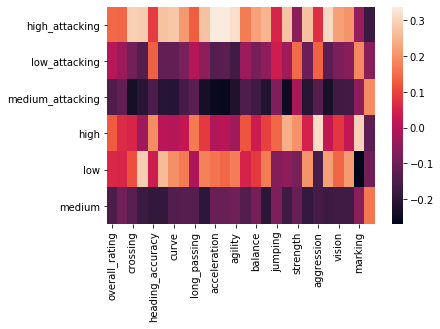

In [0]:
sns.heatmap(df2)

Por los resultados obtenidos por la correlación biserial, se determinó que las variables binarias no se explican fuertemente con las númericas, por lo tanto debemos utilizar estas variables en el modelo

# Trabajo posterior
Dentro del trabajo siguiente se propone utilizar una metodología de envolvente, donde se busque mejorar la precisión de los modelos propuestos

In [0]:
player_attributes = pd.concat([X,Y], axis=1)

In [0]:
player_attributes

,overall_rating,potential,crossing,finishing,heading_accuracy,volleys,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,positioning,vision,penalties,marking,high_attacking,low_attacking,medium_attacking,high,low,medium,overall_gk,preferred_foot_bin
0,0.557377,0.551724,0.510638,0.447917,0.721649,0.467391,0.467391,0.395833,0.648936,0.478261,0.559524,0.611765,0.564706,0.379747,0.630952,0.557895,0.536585,0.511628,0.767442,0.357895,0.714286,0.462366,0.552083,0.489362,0.688172,0,0,1,0,0,1,0.080716,1
1,0.475410,0.465517,0.510638,0.447917,0.721649,0.467391,0.467391,0.395833,0.648936,0.478261,0.559524,0.611765,0.564706,0.379747,0.630952,0.557895,0.536585,0.511628,0.767442,0.357895,0.626374,0.462366,0.552083,0.489362,0.688172,0,0,1,0,0,1,0.080716,1
2,0.459016,0.448276,0.500000,0.437500,0.711340,0.456522,0.456522,0.385417,0.638298,0.467391,0.559524,0.611765,0.564706,0.367089,0.630952,0.547368,0.536585,0.511628,0.767442,0.347368,0.615385,0.451613,0.541667,0.478723,0.655914,0,0,1,0,0,1,0.070097,1
3,0.672131,0.637931,0.840426,0.541667,0.587629,0.423913,0.739130,0.708333,0.691489,0.717391,0.785714,0.776471,0.788235,0.632911,0.928571,0.726316,0.865854,0.802326,0.534884,0.642105,0.681319,0.623656,0.677083,0.606383,0.806452,1,0,0,0,0,1,0.097667,0
4,0.672131,0.637931,0.840426,0.541667,0.587629,0.336957,0.739130,0.708333,0.691489,0.717391,0.785714,0.776471,0.788235,0.632911,0.928571,0.726316,0.865854,0.802326,0.534884,0.621053,0.681319,0.623656,0.677083,0.606383,0.806452,1,0,0,0,0,1,0.097667,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132911,0.819672,0.793103,0.882979,0.791667,0.597938,0.826087,0.913043,0.802083,0.861702,0.869565,0.630952,0.705882,0.776471,0.873418,0.726190,0.778947,0.536585,0.720930,0.662791,0.842105,0.549451,0.903226,0.906250,0.861702,0.225806,0,0,1,0,1,0,0.311425,1
132912,0.737705,0.706897,0.776596,0.781250,0.536082,0.826087,0.913043,0.760417,0.744681,0.880435,0.630952,0.647059,0.776471,0.721519,0.726190,0.768421,0.536585,0.651163,0.639535,0.757895,0.604396,0.752688,0.906250,0.723404,0.333333,0,0,1,0,1,0,0.288509,1
132913,0.721311,0.706897,0.776596,0.729167,0.536082,0.826087,0.913043,0.760417,0.744681,0.880435,0.630952,0.647059,0.776471,0.721519,0.726190,0.768421,0.536585,0.651163,0.639535,0.757895,0.670330,0.752688,0.906250,0.723404,0.333333,0,0,1,0,1,0,0.288509,1
132914,0.737705,0.724138,0.776596,0.656250,0.577320,0.826087,0.913043,0.750000,0.744681,0.934783,0.571429,0.564706,0.776471,0.658228,0.726190,0.736842,0.536585,0.662791,0.569767,0.810526,0.626374,0.709677,0.906250,0.542553,0.290323,0,0,1,0,1,0,0.288509,1


In [0]:
player_attributes.to_parquet('/content/drive/My Drive/Maestría en ciencia de los datos y análitica/Aprendizaje Automatico/player_attributes.parquet')

##**Aprendizaje No Supervisado**
...



### Visualizacion de los datos


---
A continuación veremos un paso a paso para ver de manera gráfica la base de datos que tenemos hasta el momento.


1.   Aplicar análisis de factores para datos mixtos
2.   Visualizar los datos





In [1]:
#Conectar con Drive
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# Librerias importantes
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

In [0]:
# Traemos la base de datos
player_attributes = pd.read_parquet('/content/drive/My Drive/Maestría en ciencia de los datos y análitica/Aprendizaje Automatico/player_attributes.parquet')

In [0]:
# Análisis de componentes principales
pca = PCA(n_components=2) #Establezco el número de componentes que deseo obtenre
componentes = pca.fit_transform(player_attributes) #Realizo PCA sobre mi base de datos
player_comp = pd.DataFrame(data = componentes
             , columns = ['Componente 1', 'Componente 2']) #Creo mi nueva base
             #Con los dos componentes

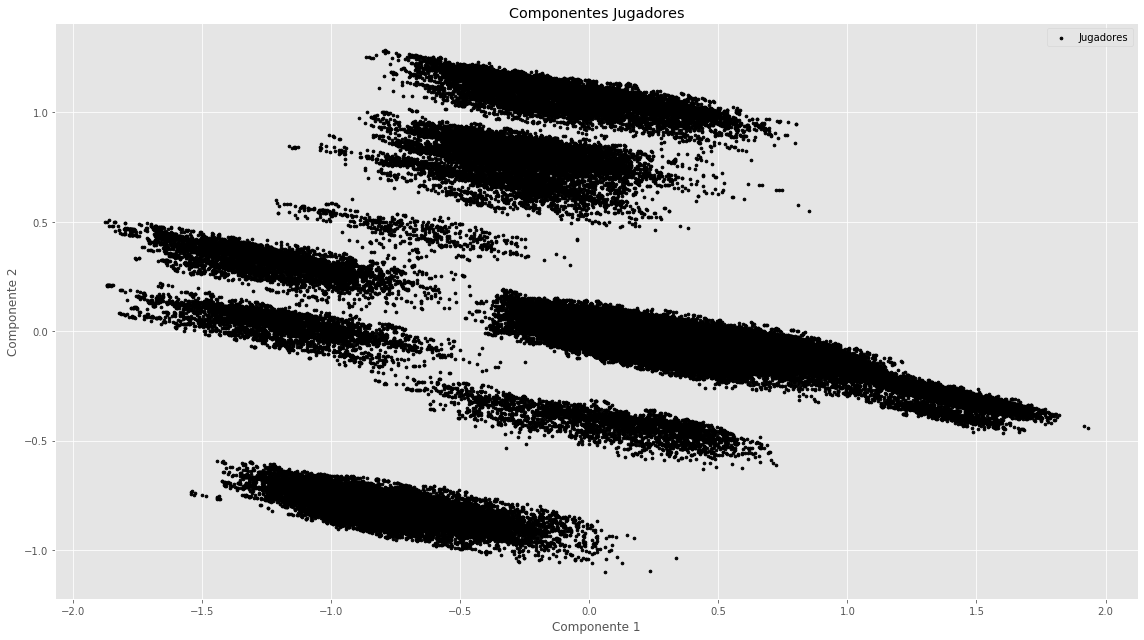

In [0]:
#Visualización de mis componentes
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
plt.scatter(player_comp.iloc[:,0],player_comp.iloc[:,1], marker = 'o', 
            color = 'black', s = 7, linewidths = 1, label = 'Jugadores')
plt.title('Componentes Jugadores')
#plt.xlim((np.min(player_comp.iloc[:,0]), np.max(player_comp.iloc[:,0])))
#plt.ylim((np.min(player_comp.iloc[:,1]), np.max(player_comp.iloc[:,1])))
plt.legend(scatterpoints=1)
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.tight_layout()
plt.show()

In [0]:
# Cuánta variabilidad estamos viendo con estos dos componentes?
pca.explained_variance_ratio_

array([0.28444482, 0.16234236])

Se puede observar que el primer componente explica el 28% de la variabilidad, mientras que el segundo el 16%, esto indica que estamos observando un 44% de la variabilidad de los datos

### Clusterización por Particiones
K - Means

In [0]:
# Traemos las libreias más importante 
from sklearn.cluster import KMeans
#K means incremental-observar

El método del codo se usa para determinar el número optimo de clusters en k-means. Este método grafica los valores de la función de costos producida para diferentes valores de $k$. A medida que $k$ aumenta, la distorisión promedio decrecerá, cada cluster tendrá  menos instancias constituyentes, y las instancias estarán más cerca a sus respectivos centroides. Sin embargo, las mejores en la distorsión promedio decreceran a medida que $k$ aumente. El valor de $k$ en el cual la mejora en distorsión cae en mayor medida se llama el codo, es en ese punto en el que se debería para de dividir los datos para los clusters futuros.

In [88]:
# Método del codo
distortions = []
K = range(1,20)
for k in K:
  kmeanModel = KMeans(n_clusters=k)
  kmeanModel.fit(player_attributes)
  distortions.append(kmeanModel.inertia_)

KeyboardInterrupt: ignored

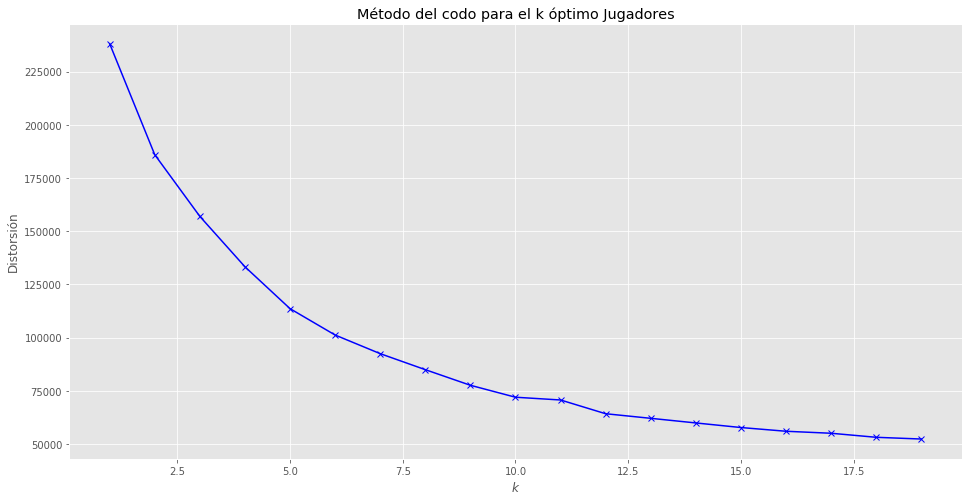

In [0]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('$k$')
plt.ylabel('Distorsión')
plt.title('Método del codo para el k óptimo Jugadores')
plt.show()

Con el método del codo en este caso es difícil mostrar cuál es el número toal de clusters, esto probablemente se de debido a la medida de distancia que estamos utilizando, al tener varias dimensiones la distancia euclidea no funciona muy bien y es por esto que no hay una pronunciación evidente del cluster.

In [0]:
# Método de la Silueta
from sklearn.metrics import silhouette_score, silhouette_samples

In [0]:
silueta_mean = []
K = range(2,15)
for k in K:
  kmeanModel = KMeans(n_clusters=k)
  labels = kmeanModel.fit_predict(player_attributes)
  silueta_promedio = silhouette_score(player_attributes,labels)
  silueta_mean.append(silueta_promedio)

In [0]:
silueta_mean

[0.26162252950861214,
 0.28097873083435765,
 0.2893297327016456,
 0.3137187761084968,
 0.29142263514359695,
 0.31267763737439314,
 0.29108407748806686,
 0.30620954209763623,
 0.3011225142117541,
 0.3075977074703305,
 0.3165480023173978,
 0.31460189988210674,
 0.29082131867869954]

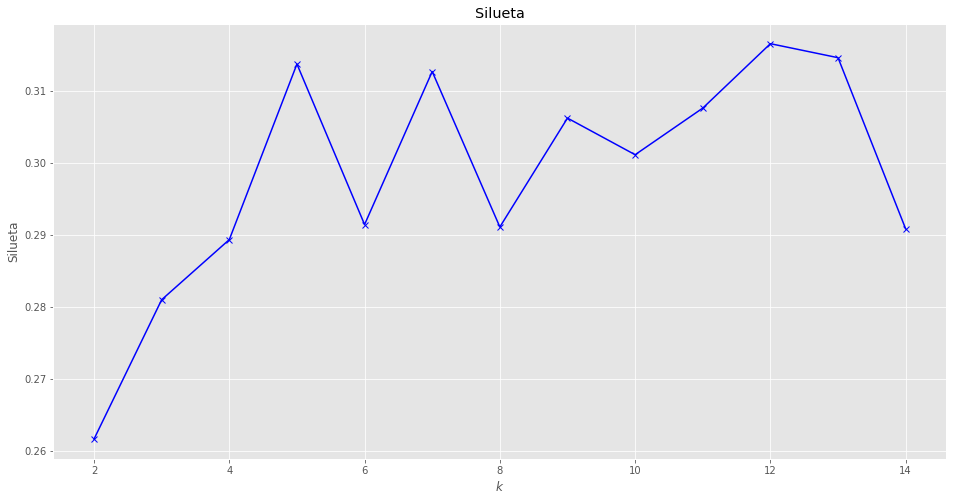

In [0]:
plt.figure(figsize=(16,8))
plt.plot(K, silueta_mean, 'bx-')
plt.xlabel('$k$')
plt.ylabel('Silueta')
plt.title('Silueta')
plt.show()

De manera concisa, la silueta mide la calidad del cluster. Esto es, determina que tan bien cada objeto está entre su cluster. Una alta silueta promedio indica un buen clustering. Debido a esto, se podría considerar que el número de clusters es 9, aunque seguiremos explorando otros métodos

Con los resultados vistos con el número de clusters, utilizaremos 5 clusters con las metodologías escogidas

In [0]:
kmeanModel = KMeans(n_clusters=5)
labels = kmeanModel.fit_predict(player_attributes)

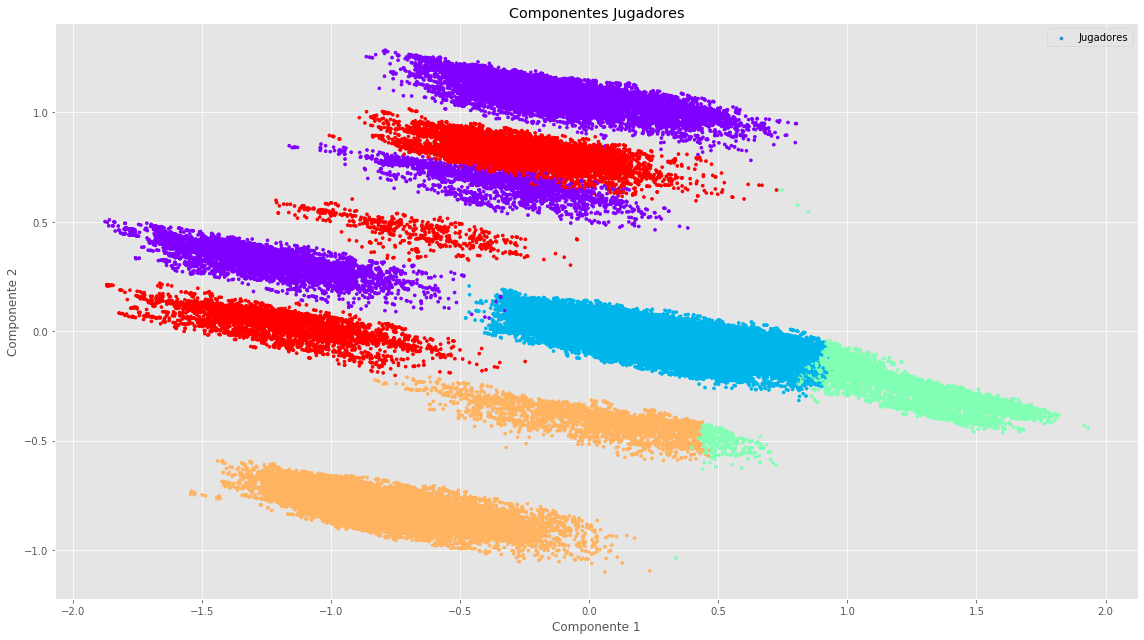

In [0]:
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
plt.scatter(player_comp.iloc[:,0],player_comp.iloc[:,1], marker = 'o', 
            c = labels, cmap = 'rainbow', s = 7, linewidths = 1, label = 'Jugadores')
plt.title('Componentes Jugadores')
#plt.xlim((np.min(player_comp.iloc[:,0]), np.max(player_comp.iloc[:,0])))
#plt.ylim((np.min(player_comp.iloc[:,1]), np.max(player_comp.iloc[:,1])))
plt.legend(scatterpoints=1)
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.tight_layout()
plt.show()

In [90]:
#Calinski-Harabasz Index
from sklearn import metrics
from sklearn.metrics import pairwise_distances
metrics.calinski_harabasz_score(player_attributes, labels)

36423.99347879301

Ahora veremos como funciona el algoritmo de k means con los dos principales componentes de nuestra matriz de habilidades de los jugadores

In [0]:
# Método del codo
distortions = []
K = range(1,20)
for k in K:
  kmeanModel = KMeans(n_clusters=k)
  kmeanModel.fit(player_comp)
  distortions.append(kmeanModel.inertia_)

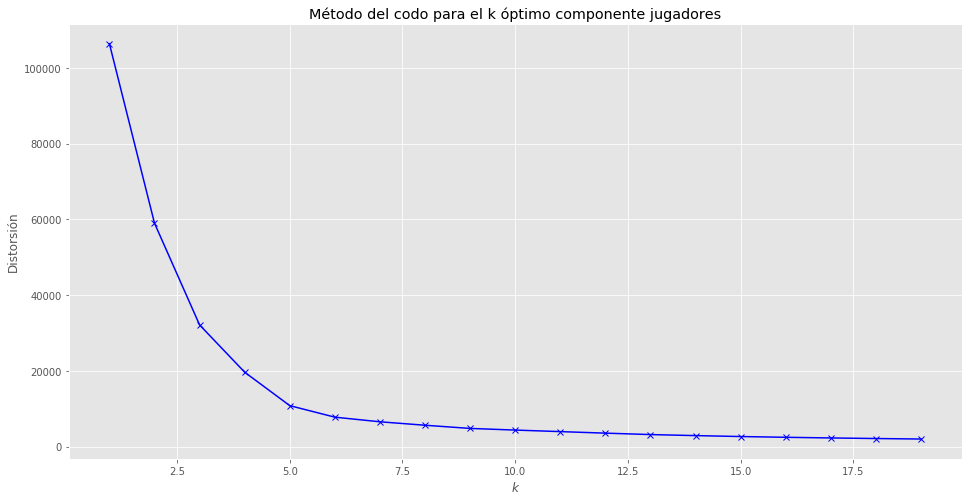

In [0]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('$k$')
plt.ylabel('Distorsión')
plt.title('Método del codo para el k óptimo componente jugadores')
plt.show()

In [0]:
silueta_mean = []
K = range(2,10)
for k in K:
  kmeanModel = KMeans(n_clusters=k)
  labels = kmeanModel.fit_predict(player_comp)
  silueta_promedio = silhouette_score(player_comp,labels)
  silueta_mean.append(silueta_promedio)

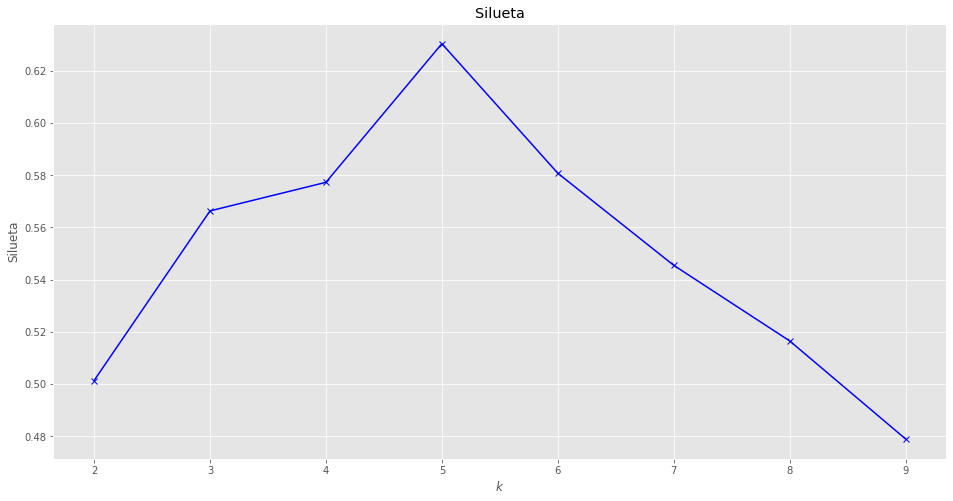

In [0]:
plt.figure(figsize=(16,8))
plt.plot(K, silueta_mean, 'bx-')
plt.xlabel('$k$')
plt.ylabel('Silueta')
plt.title('Silueta')
plt.show()

In [0]:
silueta_mean

[0.5013303076811935,
 0.5663299105370381,
 0.5772826199964987,
 0.6303982048680724,
 0.5807658582803661,
 0.5454824207477912,
 0.5165168829153974,
 0.4789354384112938]

Es evidente que al realizar la reducción de dimensionalidad obtenemos mejores resultados y más evidentes para la silueta promedio. El número de clusters a elegir para las carcterísticas de los jugadores es 5.

In [0]:
kmeanModel = KMeans(n_clusters=5)
labels = kmeanModel.fit_predict(player_comp)

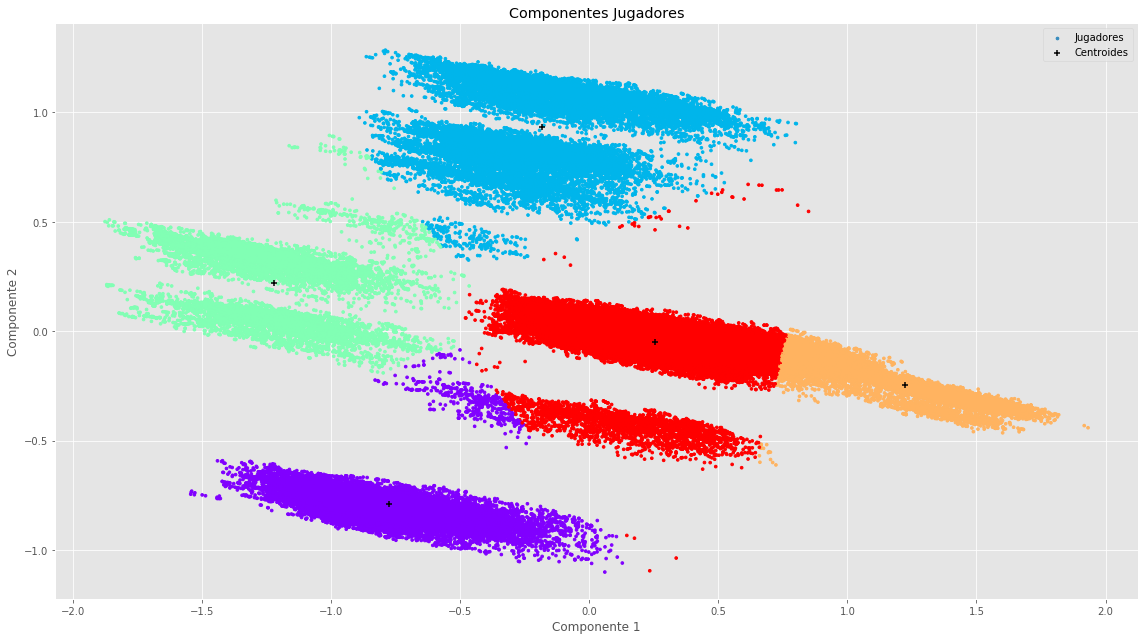

In [0]:
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
plt.scatter(player_comp.iloc[:,0],player_comp.iloc[:,1], marker = 'o', 
            c = labels, cmap = 'rainbow', s = 7, linewidths = 1, label = 'Jugadores')
plt.scatter(kmeanModel.cluster_centers_[:,0],kmeanModel.cluster_centers_[:,1],
            marker = '+', color = 'black',  label = 'Centroides')
plt.title('Componentes Jugadores')
#plt.xlim((np.min(player_comp.iloc[:,0]), np.max(player_comp.iloc[:,0])))
#plt.ylim((np.min(player_comp.iloc[:,1]), np.max(player_comp.iloc[:,1])))
plt.legend(scatterpoints=1)
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.tight_layout()
plt.show()

In [0]:
#Calinski-Harabasz Index
from sklearn import metrics
from sklearn.metrics import pairwise_distances
metrics.calinski_harabasz_score(player_comp, labels)

293813.96038151847

### Clustering Jerarquico



#### Chamaleon

Para este ejemplo utilizaremos el algoritmo aglomerativo el cual clusteriza la información utilizando un método bottom-up empezando con puntos de datos individuales.

In [0]:
#Libereria importante
import scipy.cluster.hierarchy as shc

In [0]:
muestra = player_attributes.sample(n = 5000, random_state=10)

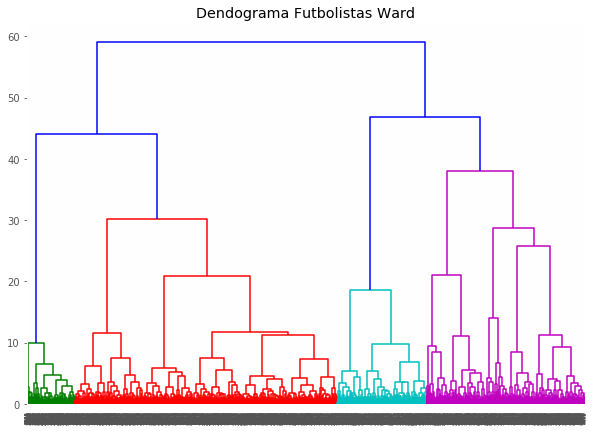

In [93]:
plt.figure(figsize=(10,7))
plt.title("Dendograma Futbolistas Ward")
dend = shc.dendrogram(shc.linkage(muestra,method='ward'))

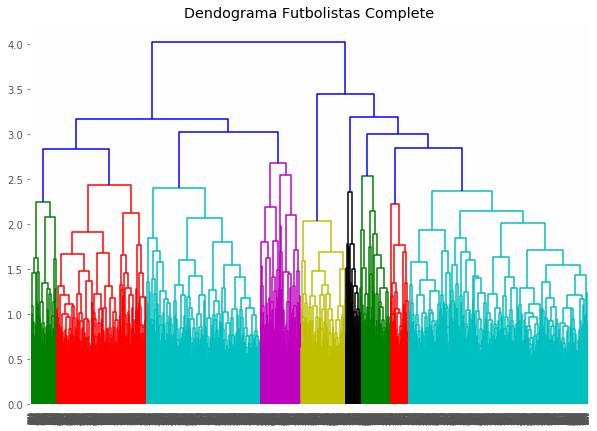

In [0]:
plt.figure(figsize=(10,7))
plt.title("Dendograma Futbolistas Complete")
dend = shc.dendrogram(shc.linkage(muestra,method='complete'))

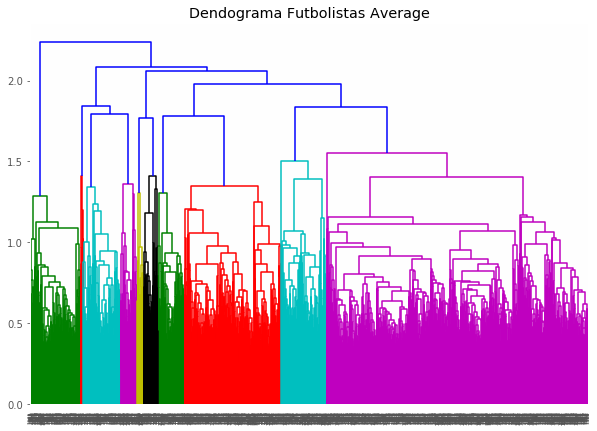

In [0]:
plt.figure(figsize=(10,7))
plt.title("Dendograma Futbolistas Average")
dend = shc.dendrogram(shc.linkage(muestra,method='average'))

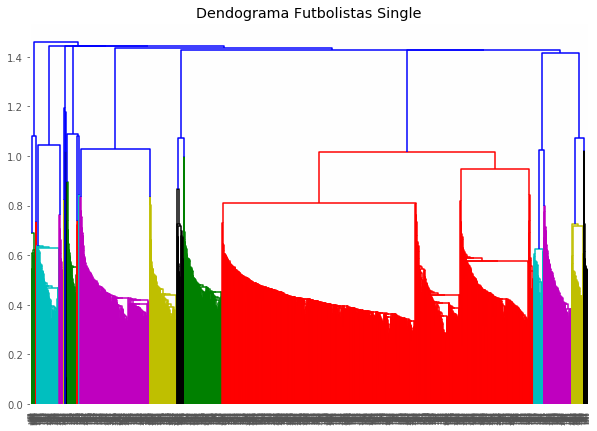

In [0]:
plt.figure(figsize=(10,7))
plt.title("Dendograma Futbolistas Single")
dend = shc.dendrogram(shc.linkage(muestra,method='single'))

In [0]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters = 5,affinity = 'euclidean', 
                                  linkage ='ward')
cluster.fit_predict(muestra)

array([2, 0, 2, ..., 2, 2, 0])

In [0]:
#Calinski-Harabasz Index
from sklearn import metrics
from sklearn.metrics import pairwise_distances
metrics.calinski_harabasz_score(muestra, cluster.labels_)

1309.8647123091669

Ahora realizaremos el mismo procedimiento con los componentes principales de mi muestra

In [0]:
# Análisis de componentes principales
pca = PCA(n_components=2) #Establezco el número de componentes que deseo obtenre
componentes = pca.fit_transform(muestra) #Realizo PCA sobre mi base de datos
comp_muestra = pd.DataFrame(data = componentes
             , columns = ['Componente 1', 'Componente 2']) #Creo mi nueva base
             #Con los dos componentes

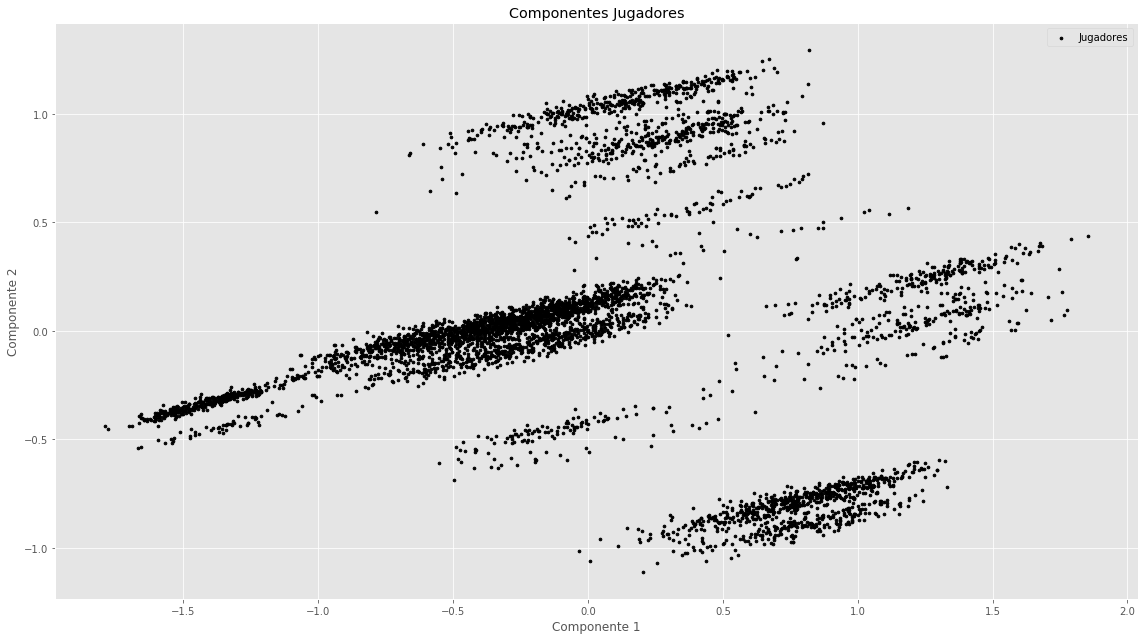

In [0]:
#Visualización de mis componentes
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
plt.scatter(comp_muestra.iloc[:,0],comp_muestra.iloc[:,1], marker = 'o', 
            color = 'black', s = 7, linewidths = 1, label = 'Jugadores')
plt.title('Componentes Jugadores')
plt.legend(scatterpoints=1)
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.tight_layout()
plt.show()

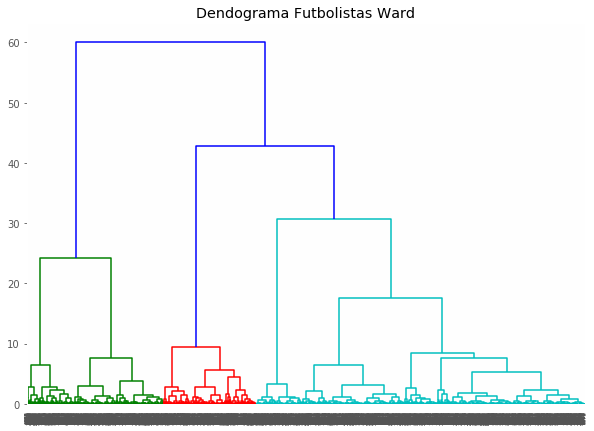

In [95]:
plt.figure(figsize=(10,7))
plt.title("Dendograma Futbolistas Ward")
dend = shc.dendrogram(shc.linkage(comp_muestra,method='ward'))

In [100]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters = 3,affinity = 'euclidean', 
                                  linkage ='ward')
cluster.fit_predict(comp_muestra)

array([1, 0, 1, ..., 1, 1, 0])

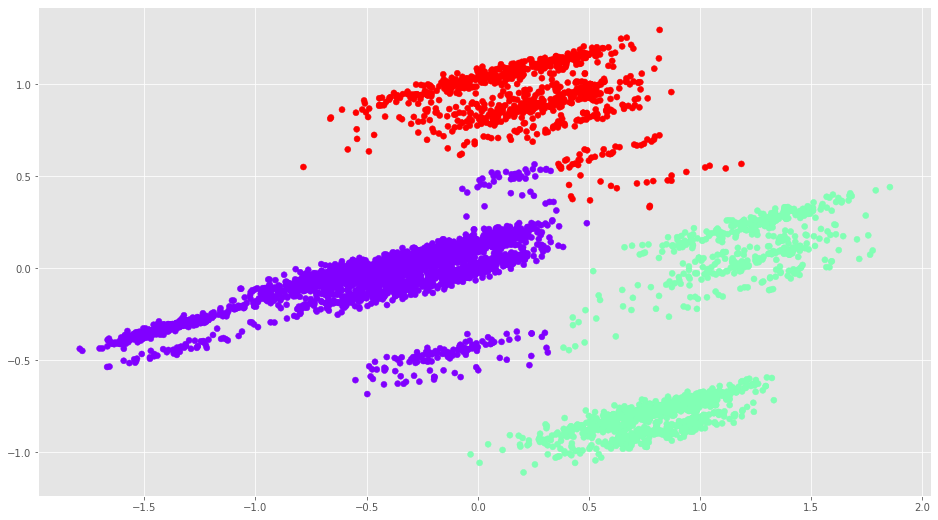

In [101]:
plt.figure(figsize=(16, 9))
plt.scatter(comp_muestra.iloc[:,0], comp_muestra.iloc[:,1], c=cluster.labels_, cmap='rainbow')

In [0]:
#Calinski-Harabasz Index
from sklearn import metrics
from sklearn.metrics import pairwise_distances
metrics.calinski_harabasz_score(comp_muestra, cluster.labels_)

5479.181256721753

### Clustering por densidades

Ahora se pretende realizar el último algoritmo no supervisado. El agrupamiento por densidades (DBSCAN), en las partes anteriores se determinaron entre 3 y 5 clusters en los cuales podríamos agrupar a los jugadores. A continuación el desarrollo de este algoritmo

Primero realizaremos el algoritmo para todos los datos, luego utilizaremos PCA para reducir la dimensionalidad y observar el comportamiento de los clusters

In [0]:
#Obtener las librerias importantes
from sklearn.cluster import DBSCAN

Primero obtenemos el número óptimo de eps para establecer nuestra área de densidad

In [0]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(player_attributes)
distances, indices = nbrs.kneighbors(player_attributes)

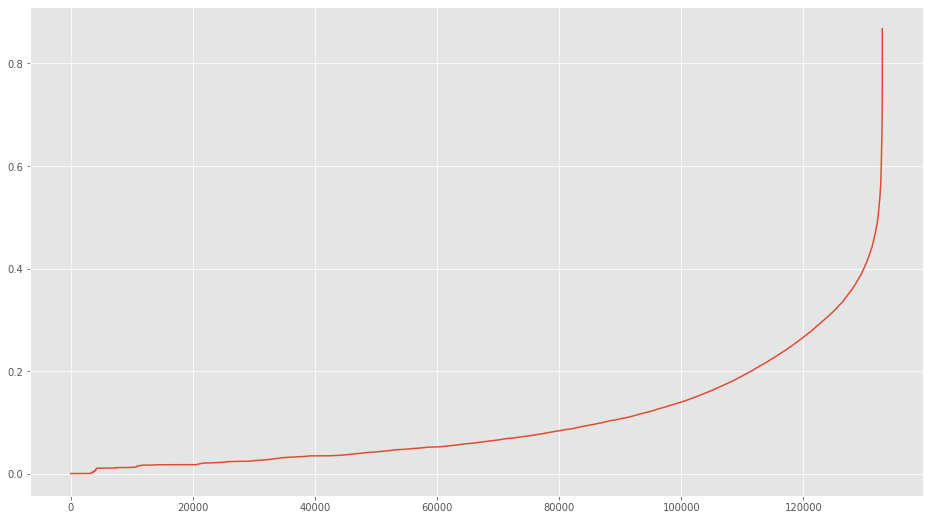

In [0]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

Debido a la gráfica anterior podríamos estar con un eps de 0,3. Ahora estableceremos el parámetro min_sample

In [0]:
dbscan = DBSCAN(eps = 0.35, min_samples=10, metric = 'manhattan')
cluster_prediction = dbscan.fit(player_attributes)

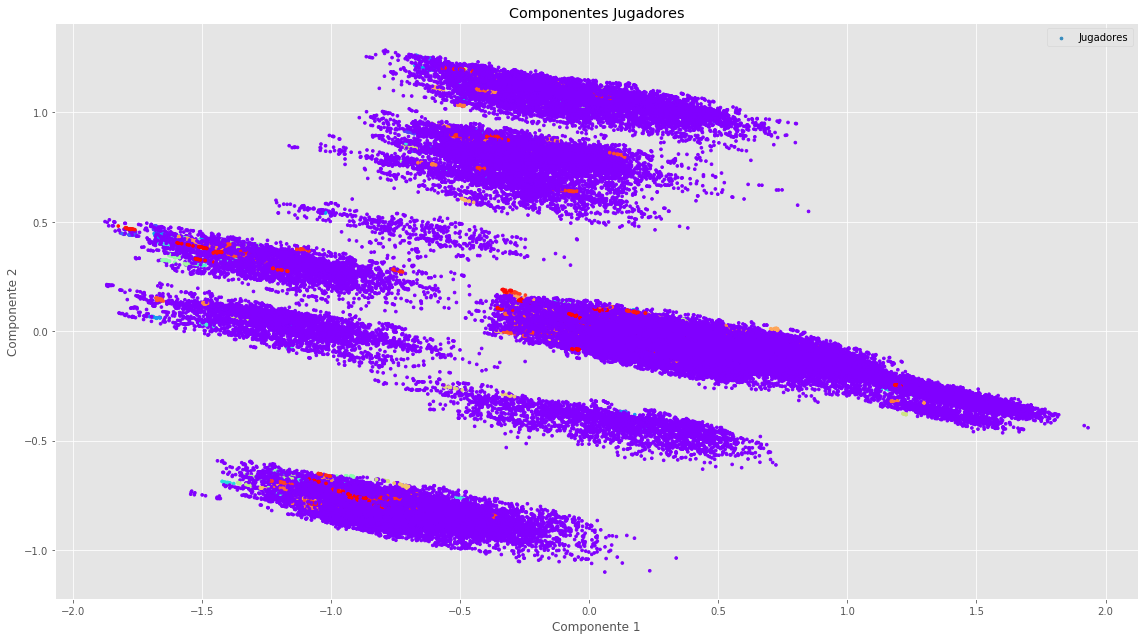

In [82]:
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
plt.scatter(player_comp.iloc[:,0],player_comp.iloc[:,1], marker = 'o', 
            c = cluster_prediction.labels_, cmap = 'rainbow', s = 7, linewidths = 1, label = 'Jugadores')
plt.title('Componentes Jugadores')
#plt.xlim((np.min(player_comp.iloc[:,0]), np.max(player_comp.iloc[:,0])))
#plt.ylim((np.min(player_comp.iloc[:,1]), np.max(player_comp.iloc[:,1])))
plt.legend(scatterpoints=1)
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.tight_layout()
plt.show()

In [0]:
etiquetas = pd.DataFrame({'lables': cluster_prediction.labels_})

In [84]:
pd.concat([player_comp,etiquetas], axis=1)

,Componente 1,Componente 2,lables
0,0.586193,-0.044125,-1
1,0.602505,-0.053470,-1
2,0.628561,-0.062574,-1
3,-0.909382,-0.815690,-1
4,-0.888508,-0.820275,-1
...,...,...,...
132911,-0.628171,0.918761,-1
132912,-0.490513,0.892695,-1
132913,-0.484983,0.895294,-1
132914,-0.429956,0.881703,-1


In [85]:
np.unique(etiquetas)

array([ -1,   0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,
        12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,
        25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,
        38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,
        51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,
        64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,
        77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,
        90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102,
       103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115,
       116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128,
       129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141,
       142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154,
       155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167,
       168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 17

Realizamos el mismo procedimiento con nuestros componentes principales

In [0]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(player_comp)
distances, indices = nbrs.kneighbors(player_comp)

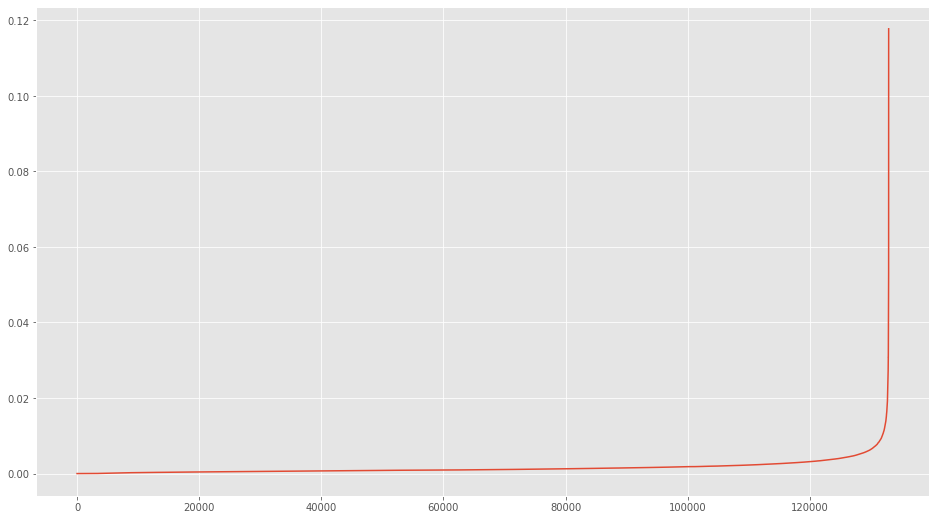

In [13]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
plt.plot(distances)
plt.show()

In [0]:
dbscan = DBSCAN(eps = 0.085, min_samples = 10, metric='manhattan')
cluster_prediction = dbscan.fit(player_comp)

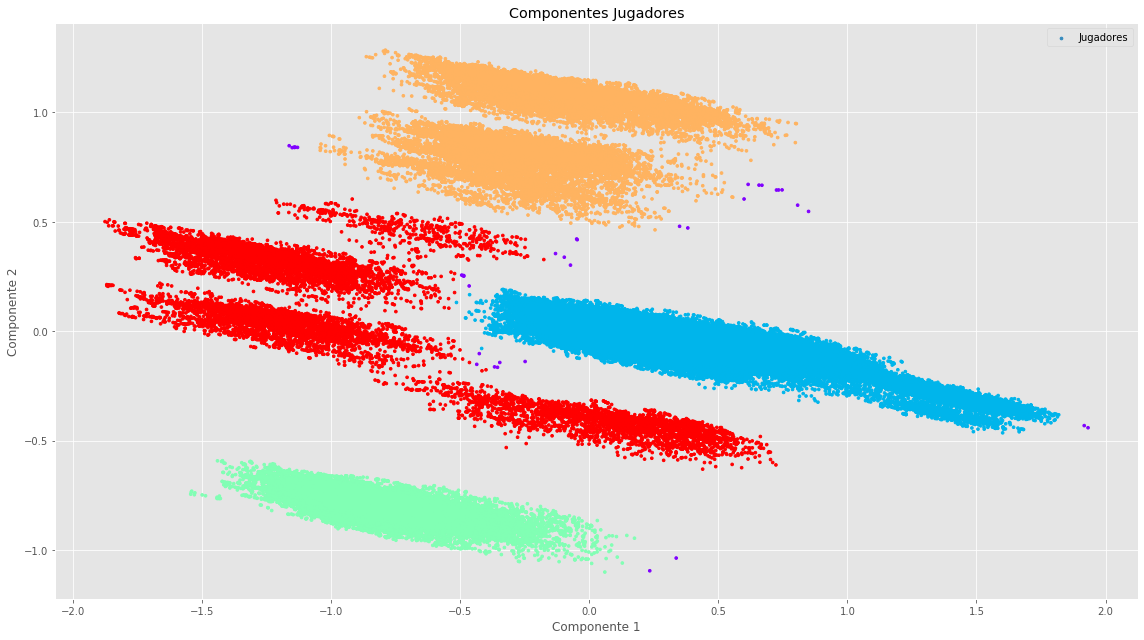

In [77]:
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
plt.scatter(player_comp.iloc[:,0],player_comp.iloc[:,1], marker = 'o', 
            c = cluster_prediction.labels_, cmap = 'rainbow', s = 7, linewidths = 1, label = 'Jugadores')
plt.title('Componentes Jugadores')
#plt.xlim((np.min(player_comp.iloc[:,0]), np.max(player_comp.iloc[:,0])))
#plt.ylim((np.min(player_comp.iloc[:,1]), np.max(player_comp.iloc[:,1])))
plt.legend(scatterpoints=1)
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.tight_layout()
plt.show()

In [78]:
cluster_prediction.labels_

array([0, 0, 0, ..., 2, 2, 2])

In [0]:
etiquetas = pd.DataFrame({'lables': cluster_prediction.labels_})

In [80]:
np.unique(etiquetas)

array([-1,  0,  1,  2,  3])

In [102]:
#Calinski-Harabasz Index
from sklearn import metrics
from sklearn.metrics import pairwise_distances
metrics.calinski_harabasz_score(player_comp, cluster_prediction.labels_)

91786.27710183158